In [1]:
# Compare spectral methods for periodic functions
# In particular look at spectral embeddings of sinusoidal vs. 
# elliptic functions (Sn, Dn, Cn)

import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from sklearn.cluster import SpectralClustering
from sklearn.manifold import SpectralEmbedding
%matplotlib inline

In [2]:
# Function
def makeAffinityMatrix(video,window=10,overlap=8):
    window = 10
    overlap = 8 # int(0.9*window)
    height, width, numFrames = video.shape

    numWindows = int(1 + (numFrames - window)/(window-overlap))
    windows = np.array([video[:,:,i*(window -overlap):i*(window-overlap)+window].flatten() for i in range(numWindows)])
    startingTimes = np.array([t[i*(window - overlap)] for i in range(numWindows)])
    
    from sklearn.metrics.pairwise import euclidean_distances

    # Use for gamma for the rbf kernel the median euclidean distance between points
    gamma = 1./ np.median(euclidean_distances(windows,windows))**2
    m = SpectralClustering(affinity='rbf',gamma = gamma)
    m.fit(windows)
    
    affinity = m.affinity_matrix_
    
    #from sklearn.metrics.pairwise import cosine_similarity
    #from sklearn.metrics.pairwise import linear_kernel
    
    
    #affinity = cosine_similarity(windows)
    #affinity = linear_kernel(windows)

    return affinity, startingTimes

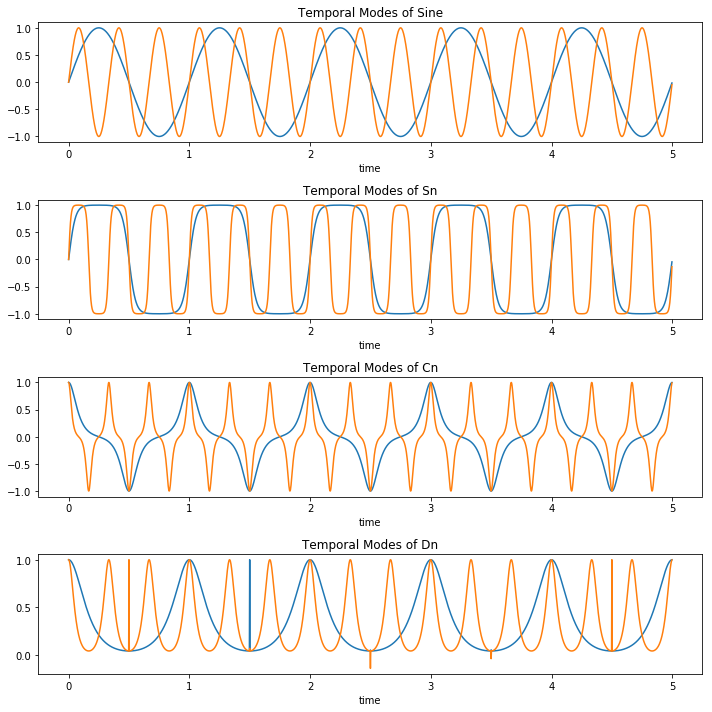

In [3]:
plt.figure(figsize=(10,10))

fileSin = sio.loadmat('/Users/seth/Desktop/Final Project/Playground/videoSin.mat')
fileSn = sio.loadmat('/Users/seth/Desktop/Final Project/Playground/videoSn.mat')
fileCn = sio.loadmat('/Users/seth/Desktop/Final Project/Playground/videoCn.mat')
fileDn = sio.loadmat('/Users/seth/Desktop/Final Project/Playground/videoDn.mat')

files = [fileSin,fileSn,fileCn,fileDn]
titles = ['Sine','Sn','Cn','Dn']


t = fileSin['t'].flatten()
for i, file in enumerate(files):
    plt.subplot(411 + i)
    mode3 = file['mode3']
    mode4 = file['mode4']
    plt.title('Temporal Modes of ' + titles[i])
    plt.plot(t,mode3['time'][0,0].flatten())
    plt.plot(t,mode4['time'][0,0].flatten())
    plt.xlabel('time')

plt.tight_layout()
plt.show()

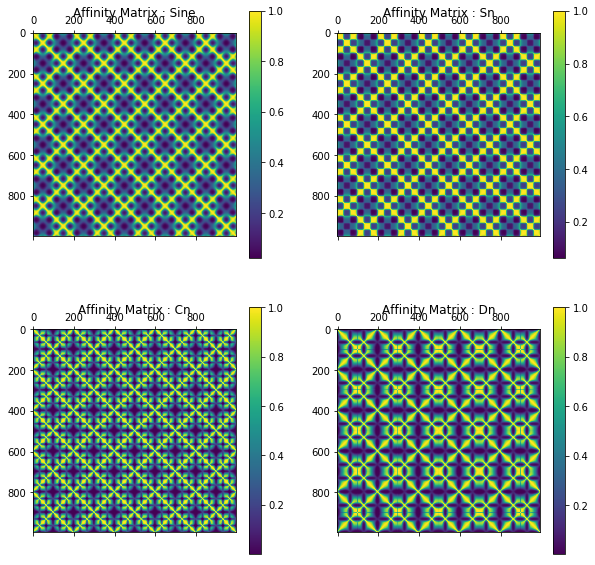

In [4]:
# Compare Affinity Matrices
# Draw affinity matrices for Sine, Sn, Cn, and Dn waves

fig = plt.figure(figsize=(10,10))

files = [fileSin,fileSn,fileCn,fileDn]
titles = ['Sine','Sn','Cn','Dn']


affinityMatrices = dict()
for i,file in enumerate(files):
    ax = fig.add_subplot(221 + i)
    video = file['videoMatrix']
    affinity,startingTimes = makeAffinityMatrix(video,window=10,overlap=8)
    affinityMatrices[titles[i]] = affinity
    cax = ax.matshow(affinity) # Draw affinity matrix
    fig.colorbar(cax)
    plt.title('Affinity Matrix : ' + titles[i])
#plt.tight_layout()
plt.show()

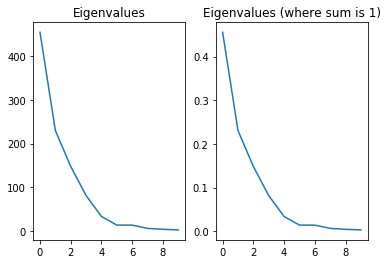

In [5]:
# Look at eigenvalue spectrum for Sine wave
plt.figure()
plt.subplot(121)
eigenval, eigenvect = np.linalg.eig(affinityMatrices['Sine'])
eigenval = np.real(eigenval)
eigenvect = np.real(eigenvect)
plt.plot(eigenval[:10])
plt.title('Eigenvalues')
plt.subplot(122)
plt.title('Eigenvalues (where sum is 1)')
plt.plot(eigenval[:10] / np.sum(eigenval))
plt.show()

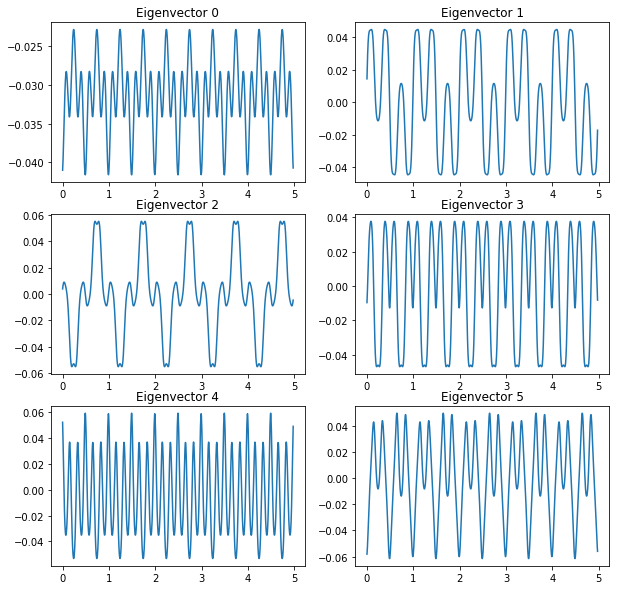

In [6]:
# Plot first 6 associated eigenvectors of affinity matrix
plt.figure(figsize=(10,10))
n = 6
for i in range(n):
    plt.subplot(3,2,i+1)
    plt.title('Eigenvector ' + str(i))
    plt.plot(startingTimes,eigenvect[:,i])
plt.show()

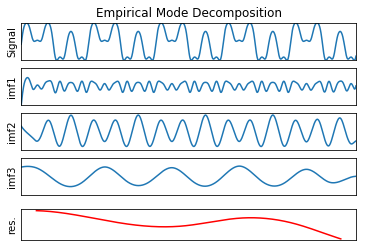

In [7]:
from pyhht.visualization import plot_imfs
from pyhht.emd import EMD
x = np.sum([eigenval[j]*eigenvect[:,j] / np.sum(eigenval) for j in range(2)],axis=0)
decomposer = EMD(x)
imfs = decomposer.decompose()
plot_imfs(x, imfs)

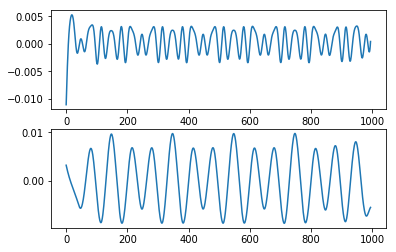

In [8]:
plt.figure()
plt.subplot(211)
plt.plot(imfs[0,:])
plt.subplot(212)
plt.plot(imfs[1,:])
plt.show()

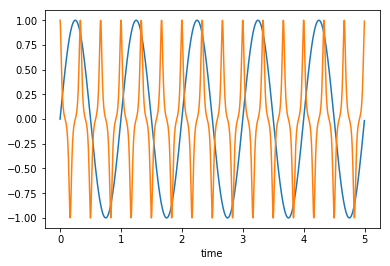

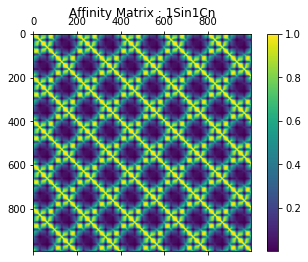

In [9]:
# Plot affinity matrix 1 sine wave with m = 1 and 1 Cn wave with m = 3

plt.figure()

# Plot temporal modes
file1Sin1Sn = sio.loadmat('/Users/seth/Desktop/Final Project/Playground/video1sin1Sn.mat')
mode31Sin1Sn = file1Sin1Sn['mode3']
mode41Sin1Sn = file1Sin1Sn['mode4']
plt.plot(t,mode31Sin1Sn['time'][0,0].flatten())
plt.plot(t,mode41Sin1Sn['time'][0,0].flatten())
plt.xlabel('time')
plt.show()

# Plot of affinity matrix
fig = plt.figure()
ax = fig.add_subplot(111)
video = file1Sin1Sn['videoMatrix']
affinity,startingTimes = makeAffinityMatrix(video,window=10,overlap=8)
cax = ax.matshow(affinity)
fig.colorbar(cax)
plt.title('Affinity Matrix : 1Sin1Cn')

plt.show()

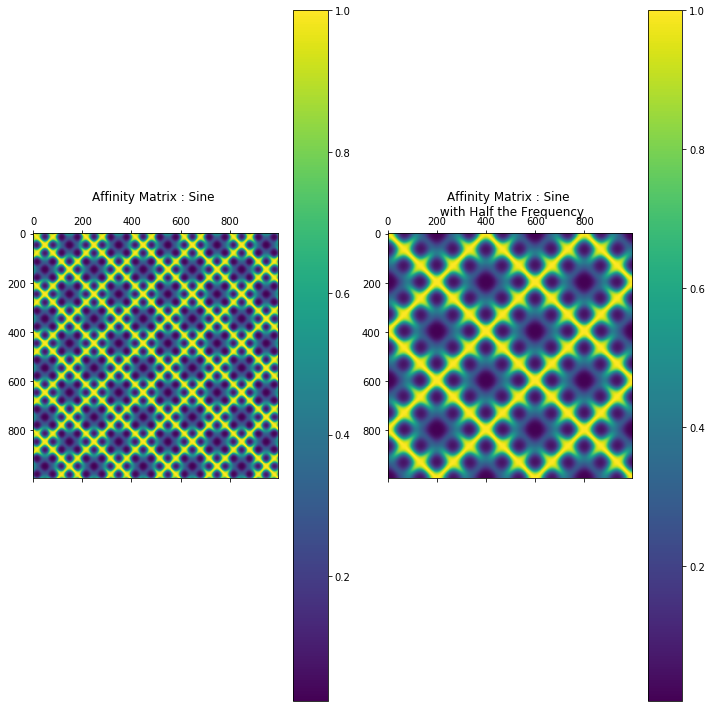

In [10]:
# Compare Affinity Matrices for 2 sinusoids where frequency is halved
# Note that this just looked like a "zoomed in" version of the original
video = fileSin['videoMatrix']

affinity,startingTimes = makeAffinityMatrix(video,window=10,overlap=8)

# Plot of affinity matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
cax = ax.matshow(affinity)
fig.colorbar(cax)
plt.title('Affinity Matrix : Sine \n')
fileSinHalf = sio.loadmat('/Users/seth/Desktop/Final Project/Playground/videoSinHalf.mat')
video = fileSinHalf['videoMatrix']

affinity,startingTimes = makeAffinityMatrix(video,window=10,overlap=8)

# Plot of affinity matrix
ax = fig.add_subplot(122)
cax = ax.matshow(affinity)
fig.colorbar(cax)
plt.title('Affinity Matrix : Sine \n with Half the Frequency')
plt.tight_layout()
plt.show()

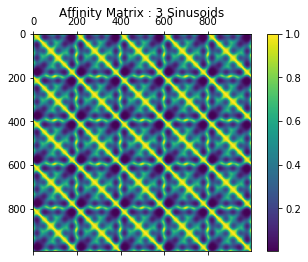

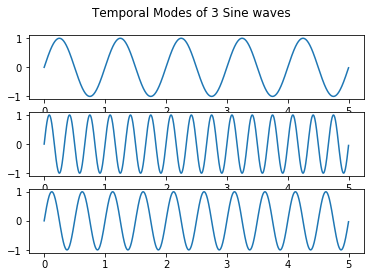

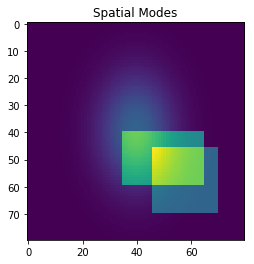

In [11]:
# Affinity matrix for 3 sinusoidal modes

file3Sin = sio.loadmat('/Users/seth/Desktop/Final Project/Playground/video3Sins.mat')

# Plot of affinity matrix
fig = plt.figure()
ax = fig.add_subplot(111)
video = file3Sin['videoMatrix']

affinity3Sines,startingTimes = makeAffinityMatrix(video,window=10,overlap=8)

cax = ax.matshow(affinity3Sines)
fig.colorbar(cax)
plt.title('Affinity Matrix : 3 Sinusoids')


plt.figure()
mode3Sin = file3Sin['mode3']
mode4Sin = file3Sin['mode4']
mode5Sin = file3Sin['mode5']
plt.suptitle('Temporal Modes of 3 Sine waves')
plt.subplot(311)
plt.plot(t,mode3Sin['time'][0,0].flatten())
plt.subplot(312)
plt.plot(t,mode4Sin['time'][0,0].flatten())
plt.subplot(313)
plt.plot(t,mode5Sin['time'][0,0].flatten())

plt.figure()
plt.title('Spatial Modes')
plt.imshow(video[:,:,50])
plt.show()

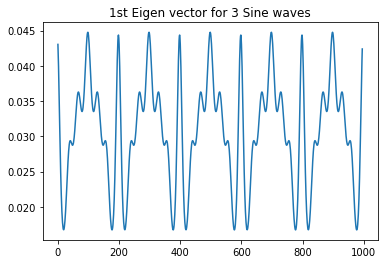

In [12]:
eigenvals3Sines,eigenvect3Sines = np.linalg.eig(affinity3Sines)
plt.figure()
plt.title('1st Eigen vector for 3 Sine waves')
plt.plot(np.real(eigenvect3Sines[:,0]))
plt.show()

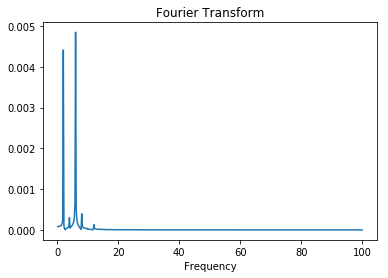

In [13]:
import scipy
N = len(startingTimes)
plt.figure()
T = startingTimes[1] 
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
yf = scipy.fftpack.fft(eigenvect[:,0])

plt.title('Fourier Transform')
plt.plot(xf[1:], 2.0/N * np.abs(yf[:N//2][1:]))
plt.xlabel('Frequency')
#plt.xlim(0,15)
plt.show()

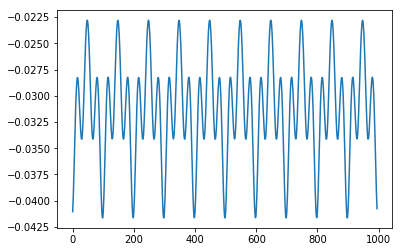

In [14]:
plt.figure()
plt.plot(eigenvect[:,0])
plt.show()

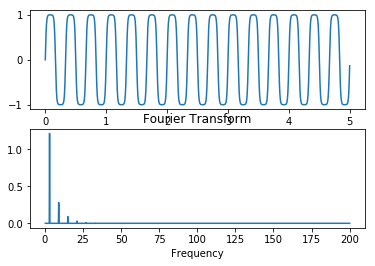

In [15]:
plt.figure()
mode4 = fileSn['mode4']
plt.subplot(211)
plt.plot(t, mode4['time'][0,0].flatten())

plt.subplot(212)
N = len(t)
T = t[1] 
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
yf = scipy.fftpack.fft(mode4['time'][0,0].flatten())
plt.title('Fourier Transform')
plt.plot(xf[1:], 2.0/N * np.abs(yf[:N//2][1:]))
plt.xlabel('Frequency')
#plt.xlim(0,15)
plt.show()
plt.show()